In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from keras.losses import binary_crossentropy

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# train_dir = "../input/emotion-detection-fer/train" #passing the path with training images
# test_dir = "../input/emotion-detection-fer/test"   #passing the path with testing images
train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"

In [ ]:
img_size = 48 #original size of the image

In [ ]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 32,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 10343 images belonging to 3 classes.
Found 796 images belonging to 3 classes.


In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax')) 

model.compile(
    optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']
  )

In [ ]:
epochs = 48
batch_size = 32

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [15]:
training = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/48
324/324 [==============================] - 1939s 6s/step - loss: 8.5162 - accuracy: 0.3612 - val_loss: 8.1254 - val_accuracy: 0.3003
Epoch 2/48
324/324 [==============================] - 72s 221ms/step - loss: 7.9203 - accuracy: 0.3760 - val_loss: 7.5040 - val_accuracy: 0.3518
Epoch 3/48
324/324 [==============================] - 75s 232ms/step - loss: 7.3221 - accuracy: 0.3749 - val_loss: 6.7755 - val_accuracy: 0.4472
Epoch 4/48
324/324 [==============================] - 70s 217ms/step - loss: 6.6611 - accuracy: 0.3973 - val_loss: 6.1420 - val_accuracy: 0.4611
Epoch 5/48
324/324 [==============================] - 70s 216ms/step - loss: 6.0015 - accuracy: 0.4023 - val_loss: 5.5010 - val_accuracy: 0.4724
Epoch 6/48
324/324 [==============================] - 70s 215ms/step - loss: 5.3393 - accuracy: 0.4097 - val_loss: 4.8627 - val_accuracy: 0.5101
Epoch 7/48
324/324 [==============================] - 66s 204ms/step - loss: 4.7327 - accuracy: 0.4155 - val_loss: 4.2829 - val_acc

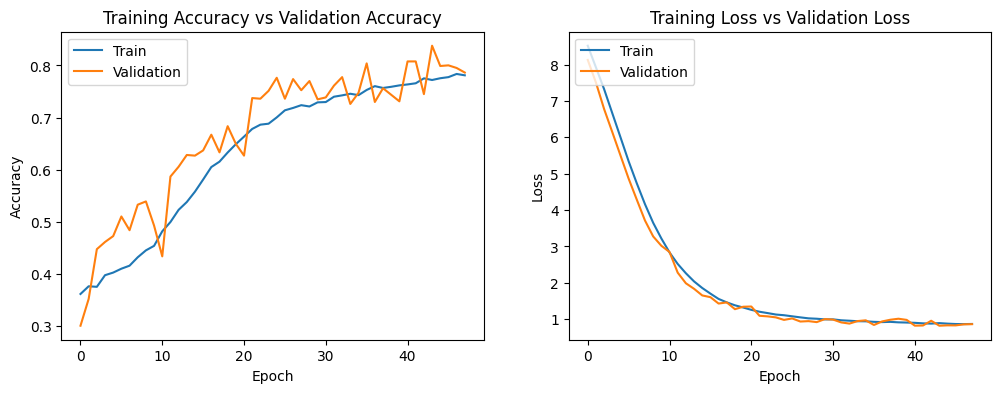

In [18]:
fig , ax = plt.subplots(1,2)
train_acc = training.history['accuracy']
train_loss = training.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(training.history['accuracy'])
ax[0].plot(training.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(training.history['loss'])
ax[1].plot(training.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model_optimal.h5')

In [ ]:
model.save('/content/drive/MyDrive/model_happy.h5')

In [ ]:
img = tf.keras.utils.load_img("no.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 28ms/step
[1.0, 0.0, 0.0]


In [ ]:
label_dict = {0:'Angry',1:'Happy',2:'Sad'}
img_index = result.index(max(result))
print(label_dict[img_index])

Angry


In [ ]:
history

In [ ]:
img = tf.keras.utils.load_img("/content/drive/MyDrive/test/PrivateTest_2626531.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

FileNotFoundError: ignored

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [ ]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[3.9386793e-23, 0.0, 3.136921e-15, 0.9999962, 0.0, 0.0, 3.8061755e-06]


In [ ]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

25/25 [==============================] - 2s 61ms/step - loss: 0.8713 - accuracy: 0.7889
final train accuracy = 84.11 , validation accuracy = 78.89


In [ ]:
model.save_weights('model_weights.h5')